In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr
import functions as main

import warnings
warnings.filterwarnings('ignore')

# Load Full Clean Df

In [4]:
opencsv = pd.read_csv(r"D:\OneDrive - Instituto Politecnico de Castelo Branco\002_Learning\001_Pos_Graduacao\Ciclo 5 - Projeto Final\ProjetoFinal-PosGraduacaoEngenhariaFinanceira\full_clean_df.csv", sep=",")
opencsv.set_index('Date', inplace=True)
opencsv.index = pd.to_datetime(opencsv.index)
opencsv = opencsv.astype(float)

In [5]:
opencsv.tail()

,JPY_EUR,BTC_PageViews,Crypto_PageViews,BTC_Supply,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,...,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-12,0.005814,4441.0,29.0,1.972469e+07,0.173909,-0.387231,-2.548467,-0.196386,1.105177,1.510878,...,-0.570336,0.877535,0.961116,0.570098,0.417108,-0.489437,0.674785,0.793739,1.231448,-0.438803
2024-07-19,0.005837,4161.0,27.0,1.972799e+07,2.010968,0.811656,0.388939,-0.196386,0.394258,0.343247,...,-2.357618,-2.370832,-0.891638,-1.991920,-0.491820,-1.527084,-0.826117,-0.863727,-1.032944,0.519523
2024-07-26,0.005995,4953.0,48.0,1.973157e+07,0.161521,-0.162987,-0.249010,-0.196386,-0.715811,1.628331,...,-1.641331,0.236801,-1.039582,-0.833632,-0.420328,-1.313737,-0.144462,0.083399,-0.310420,0.411927
2024-08-02,0.006054,4674.0,27.0,1.973481e+07,-1.441678,2.726636,0.655882,-0.307659,-0.435790,0.524561,...,0.783129,0.929002,2.014718,1.504548,1.309564,0.800172,0.981952,0.983564,-0.401305,0.014407
2024-08-09,0.006054,5059.0,28.0,1.973761e+07,-0.331783,-0.564304,-0.897957,-0.307659,0.058476,-0.034063,...,-0.010564,0.183964,0.183092,0.087901,-0.201906,-0.082311,-0.156229,-0.160874,0.496958,0.175323


In [6]:
full_sample = opencsv.loc["2010-9-10":"2024-07-26"]
full_sample

,JPY_EUR,BTC_PageViews,Crypto_PageViews,BTC_Supply,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,...,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,,,,,
2010-10-01,0.008780,NaN,NaN,4.157600e+06,-0.291692,-0.080586,-0.042738,-1.309421,1.094003,1.109584,...,-1.079620,-1.326496,-0.048535,-1.813269,0.660546,0.505392,1.135990,0.806592,-0.017511,0.372463
2010-10-08,0.008710,NaN,NaN,4.206900e+06,0.412845,-0.404645,0.648508,1.929753,1.104355,1.403863,...,0.693472,0.797672,1.570852,0.741525,0.847527,0.911464,-0.019659,1.101136,-0.104825,-0.884474
2010-10-15,0.008720,NaN,NaN,4.267300e+06,0.224014,-0.356657,-0.716145,0.290535,0.515537,1.128018,...,1.969096,0.744594,-0.225812,0.153508,0.589983,0.856091,-2.202740,-1.083577,-0.051403,-0.224384
2010-10-22,0.008840,NaN,NaN,4.349150e+06,-0.173006,0.218665,-0.394398,0.302804,-0.573261,0.314354,...,-0.059123,0.452523,-0.119477,0.579312,-1.516202,-0.998916,0.900158,0.687278,0.037347,1.404101
2010-10-29,0.008890,NaN,NaN,4.423100e+06,1.987460,-0.404645,0.817632,-1.998972,-0.514017,-0.298105,...,0.438356,-0.636118,-0.828680,-0.333114,0.896919,1.216017,-0.369190,0.227349,-0.080124,-0.900285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-28,0.005808,3687.0,17.0,1.971838e+07,-1.096763,-0.287993,0.693789,-1.249804,-0.012735,-0.833454,...,-0.157753,-0.263855,1.351050,0.318987,0.095952,-0.284732,-1.422751,-1.017257,-0.089459,0.799206
2024-07-05,0.005730,4547.0,28.0,1.972142e+07,-1.033043,-1.534834,2.426331,0.274254,1.180797,-0.655342,...,1.231643,0.564620,1.116106,-0.170522,1.371988,1.711919,0.481538,0.775981,-0.698743,-0.969224
2024-07-12,0.005814,4441.0,29.0,1.972469e+07,0.173909,-0.387231,-2.548467,-0.196386,1.105177,1.510878,...,-0.570336,0.877535,0.961116,0.570098,0.417108,-0.489437,0.674785,0.793739,1.231448,-0.438803


In [7]:
full_sample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 722 entries, 2010-10-01 to 2024-07-26
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   JPY_EUR             722 non-null    float64
 1   BTC_PageViews       474 non-null    float64
 2   Crypto_PageViews    474 non-null    float64
 3   BTC_Supply          722 non-null    float64
 4   BTC_USD             722 non-null    float64
 5   Mining_Difficulty   722 non-null    float64
 6   USD_OnChain_Volume  722 non-null    float64
 7   M2_Liquidity        722 non-null    float64
 8   EUR_USD             722 non-null    float64
 9   JPY_USD             722 non-null    float64
 10  SPY                 722 non-null    float64
 11  QQQ                 722 non-null    float64
 12  EXSA                722 non-null    float64
 13  JPXN                722 non-null    float64
 14  IWDA                722 non-null    float64
 15  GLD                 722 non-null    fl

In [8]:
full_sample = full_sample.drop(columns=["BTC_PageViews", "Crypto_PageViews"]) # removi porque nao tem a informacao completa para estes anos todos
full_sample

,JPY_EUR,BTC_Supply,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,SPY,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,,,
2010-10-01,0.008780,4.157600e+06,-0.291692,-0.080586,-0.042738,-1.309421,1.094003,1.109584,-0.378162,-1.079620,-1.326496,-0.048535,-1.813269,0.660546,0.505392,1.135990,0.806592,-0.017511,0.372463
2010-10-08,0.008710,4.206900e+06,0.412845,-0.404645,0.648508,1.929753,1.104355,1.403863,0.789831,0.693472,0.797672,1.570852,0.741525,0.847527,0.911464,-0.019659,1.101136,-0.104825,-0.884474
2010-10-15,0.008720,4.267300e+06,0.224014,-0.356657,-0.716145,0.290535,0.515537,1.128018,0.369584,1.969096,0.744594,-0.225812,0.153508,0.589983,0.856091,-2.202740,-1.083577,-0.051403,-0.224384
2010-10-22,0.008840,4.349150e+06,-0.173006,0.218665,-0.394398,0.302804,-0.573261,0.314354,0.091212,-0.059123,0.452523,-0.119477,0.579312,-1.516202,-0.998916,0.900158,0.687278,0.037347,1.404101
2010-10-29,0.008890,4.423100e+06,1.987460,-0.404645,0.817632,-1.998972,-0.514017,-0.298105,-0.187107,0.438356,-0.636118,-0.828680,-0.333114,0.896919,1.216017,-0.369190,0.227349,-0.080124,-0.900285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-28,0.005808,1.971838e+07,-1.096763,-0.287993,0.693789,-1.249804,-0.012735,-0.833454,-0.196526,-0.157753,-0.263855,1.351050,0.318987,0.095952,-0.284732,-1.422751,-1.017257,-0.089459,0.799206
2024-07-05,0.005730,1.972142e+07,-1.033043,-1.534834,2.426331,0.274254,1.180797,-0.655342,1.135617,1.231643,0.564620,1.116106,-0.170522,1.371988,1.711919,0.481538,0.775981,-0.698743,-0.969224
2024-07-12,0.005814,1.972469e+07,0.173909,-0.387231,-2.548467,-0.196386,1.105177,1.510878,0.391958,-0.570336,0.877535,0.961116,0.570098,0.417108,-0.489437,0.674785,0.793739,1.231448,-0.438803


In [9]:
full_sample.isna().sum()

JPY_EUR               0
BTC_Supply            0
BTC_USD               0
Mining_Difficulty     0
USD_OnChain_Volume    0
M2_Liquidity          0
EUR_USD               0
JPY_USD               0
SPY                   0
QQQ                   0
EXSA                  0
JPXN                  0
IWDA                  0
GLD                   0
SLV                   0
TLT                   0
BND                   0
Nr_Transactions       0
Nr_Addresses          0
dtype: int64

# Granger causality test 

In [40]:
# It is a statistical hypothesis test for determining whether one time series is useful in forecasting another

from statsmodels.tsa.stattools import grangercausalitytests

# lists to store variables
causality_true = []
causality_false = []

maxlag = 10
dependent_variable = "BTC_USD"

for column in full_sample.columns:
    if column != dependent_variable:  # Skip the target variable
        # Perform Granger Causality Test
        # The data for testing whether the time series in the second column Granger causes the time series in the first column. 
        result = grangercausalitytests(full_sample[[dependent_variable, column]], maxlag=maxlag, verbose=False)
        
        # Check if any lag has a p-value < 0.05
        min_p_value = min([result[lag][0]['ssr_chi2test'][1] for lag in range(1, maxlag+1)])

        if min_p_value < 0.05:
            causality_true.append(column)
        else:
            causality_false.append(column)

# Output the results
print(f"Variables that Granger-cause {dependent_variable}:", causality_true)
print(f"Variables that do NOT Granger-cause {dependent_variable}:", causality_false)

Variables that Granger-cause BTC_USD: ['BTC_Supply', 'SPY', 'EXSA', 'GLD', 'SLV', 'Nr_Transactions']
Variables that do NOT Granger-cause BTC_USD: ['JPY_EUR', 'Mining_Difficulty', 'USD_OnChain_Volume', 'M2_Liquidity', 'EUR_USD', 'JPY_USD', 'QQQ', 'JPXN', 'IWDA', 'TLT', 'BND', 'Nr_Addresses']


# PACF - BTC USD Price

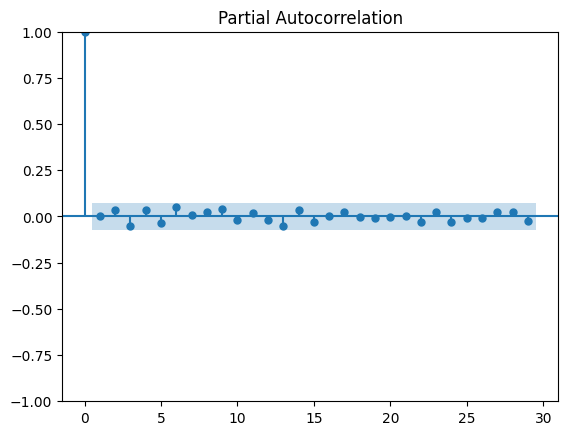

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(full_sample.BTC_USD)
plt.show()

**So consider an AR(1)**

# Model Dfs

In [94]:
df_model = full_sample.copy()
#df_model.drop(columns=causality_false, inplace=True)

In [95]:
full_sample.columns

Index(['JPY_EUR', 'BTC_Supply', 'BTC_USD', 'Mining_Difficulty',
       'USD_OnChain_Volume', 'M2_Liquidity', 'EUR_USD', 'JPY_USD', 'SPY',
       'QQQ', 'EXSA', 'JPXN', 'IWDA', 'GLD', 'SLV', 'TLT', 'BND',
       'Nr_Transactions', 'Nr_Addresses'],
      dtype='object')

In [96]:
'''
Distinguish between endogenous and exogenous variables based on their roles in the Bitcoin market:

Endogenous Variables: These are the primary variables of interest that the model aims to predict. 
They include the equilibrium closing price of Bitcoin (MKPRU), the number of unique MyWallet users (MWNUS), 
and the total Bitcoin available in the market (TOTBC)1.

Exogenous Variables: These are external factors that influence the endogenous variables. 
They include Miner’s Revenue (MIREV), Bitcoin Difficulty (DIFF), Number of Transactions per Block (NTRBL), 
Average Block Size (AVBLS), Change in the Number of Unique Addresses (NADDU), Total Output Volume (TRVOU), 
and Hash Rate (HRATE).

These distinctions help in understanding and forecasting Bitcoin’s market behavior.
'''

# Example: Based on your output, you might start by removing BND, SPY, QQQ, JPXN, EXSA, and TLT, which all have high p-values.

endog = ['BTC_USD', 'BTC_Supply', 'Mining_Difficulty', 'USD_OnChain_Volume', 'Nr_Transactions', 'Nr_Addresses']
exog = ['JPY_EUR', 'M2_Liquidity', 'EUR_USD', 'IWDA', 'GLD', 'SLV']

split = int(0.9*(len(full_sample)))

df_train = df_model[:split]
df_test = df_model[split:]

# Split the data into endogenous and exogenous variables for the training set
df_endog_train = df_train[endog]
df_exog_train = df_train[exog]

# Split the data into endogenous and exogenous variables for the testing set
df_endog_test = df_test[endog]
df_exog_test = df_test[exog]

In [97]:
df_train.shape

(649, 19)

In [98]:
df_test.shape

(73, 19)

# Determine max number lags

We can test the performance of our model by using the following methods:

**Akaike information criterion (AIC)**: It quantifies the quality of a model by balancing the fit of the model to the data with the complexity of the model. AIC provides a way to compare different models and choose the one that best fits the data with the least complexity.

**Bayesian information criterion (BIC)**: This stats measure is used for model selection among a set of candidate models. Like the Akaike information criterion (AIC), BIC provides a trade-off between the goodness of fit and model complexity. However, BIC places a stronger penalty on the number of parameters than AIC does, which can help prevent overfitting.

In [99]:
# Lower is better

model = VAR(endog = df_endog_train, exog = df_exog_train)
model.select_order(10).summary()

,AIC,BIC,FPE,HQIC
0,29.11,29.40,4.389e+12,29.22
1,15.28,15.82,4.318e+06,15.49
2,13.93,14.72*,1.117e+06,14.24*
3,13.94,14.98,1.128e+06,14.34
4,13.91*,15.21,1.098e+06*,14.41
5,13.94,15.49,1.135e+06,14.54
6,13.98,15.78,1.176e+06,14.68
7,14.00,16.05,1.208e+06,14.80
8,14.04,16.34,1.252e+06,14.93
9,14.10,16.66,1.335e+06,15.09


# Fit a VAR Model

In [100]:
# Escolhi 4 lags porque é o que tem o AIC mais baixo e o BIC mais baixo é o lag 1, então também inclui esse

model = VAR(endog = df_endog_train, exog = df_exog_train)
model_fit = model.fit(maxlags=4)
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 22, Aug, 2024
Time:                     13:43:37
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    15.3490
Nobs:                     645.000    HQIC:                   14.5602
Log likelihood:          -9839.69    FPE:                1.27772e+06
AIC:                      14.0601    Det(Omega_mle):         964082.
--------------------------------------------------------------------
Results for equation BTC_USD
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                        -0.927437         0.752390           -1.233           0.218
JPY_EUR                       1.560204         1.152287            1.354           0.176
M2_Liquidity              

prob = p-value

In [101]:
df_coeff=pd.DataFrame([model_fit.params["BTC_USD"], model_fit.pvalues["BTC_USD"]]).T
df_coeff.columns = ["coeff", "pval"]
df_coeff = df_coeff.query("pval < 0.05")
df_coeff

,coeff,pval
EUR_USD,0.089744,0.034662
IWDA,0.139543,0.000654
L3.BTC_Supply,-0.000077,0.003638
L3.Nr_Transactions,-0.169406,0.018739
L4.BTC_Supply,0.000037,0.004394


# So our final model is:

Só considera prob / p-value < 0.05


BTC_USD = 0.35L1.SPY - 0.12L2.USD_OnChain_Volume + 0.14L2.SLV


# Validate model - MAE and RMSE

In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Step 1: Make predictions on the test set
# We start predicting after the last lag in the training set

# Initialize an empty DataFrame to store results for each lag
results_df = pd.DataFrame(columns=["Lag", "MAE", "RMSE", "MAPE"])

# Iterate over different lag values
for lag in range(1, 12):  # Start at 1 to avoid using a zero-lag, which doesn't make sense
    # Re-fit the model for the current lag
    model = VAR(endog = df_endog_train, exog = df_exog_train)
    model_fit = model.fit(maxlags=lag)
    
    # Make predictions on the test set
    n_forecast = len(df_test)
    forecast = model_fit.forecast(y=df_endog_train.values[-lag:], steps=n_forecast, exog_future=df_exog_test.values)

    # Convert the forecast to a DataFrame with the same column names as df_train
    forecast_df = pd.DataFrame(forecast, index=df_endog_test.index, columns=df_endog_test.columns)

    # Calculate MAE, RMSE, and MAPE for the specific column ('BTC_USD')
    mae = mean_absolute_error(df_test.BTC_USD, forecast_df.BTC_USD)
    rmse = np.sqrt(mean_squared_error(df_test.BTC_USD, forecast_df.BTC_USD))
    mape = mean_absolute_percentage_error(df_test.BTC_USD, forecast_df.BTC_USD)

    # Save the results into the DataFrame using pd.concat
    result_row = pd.DataFrame({"Lag": [lag], "MAE": [mae], "RMSE": [rmse], "MAPE": [mape]})
    results_df = pd.concat([results_df, result_row], ignore_index=True)
    
# Set the 'Lag' column as the index
results_df.set_index("Lag", inplace=True)

# Display the results DataFrame
print(results_df)

'''# Print the results
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)'''

          MAE      RMSE      MAPE
Lag                              
1    0.728043  1.006464  1.386252
2    0.724631  0.994923  1.404049
3    0.724230  0.993429  1.432922
4    0.726696  0.992123  1.464513
5    0.726522  0.994274  1.454137
6    0.728328  0.999319  1.447785
7    0.716122  0.988561  1.432667
8    0.723145  0.998870  1.489752
9    0.723540  0.996452  1.474701
10   0.724339  1.000813  1.422770
11   0.722172  0.997733  1.471210


'# Print the results\nprint("Mean Absolute Error (MAE):", mae)\nprint("Root Mean Squared Error (RMSE):", rmse)\nprint("Mean Absolute Percentage Error (MAPE):", mape)'

**RMSE of test > RMSE of train => OVER FITTING of the data.**

**RMSE of test < RMSE of train => UNDER FITTING of the data.**

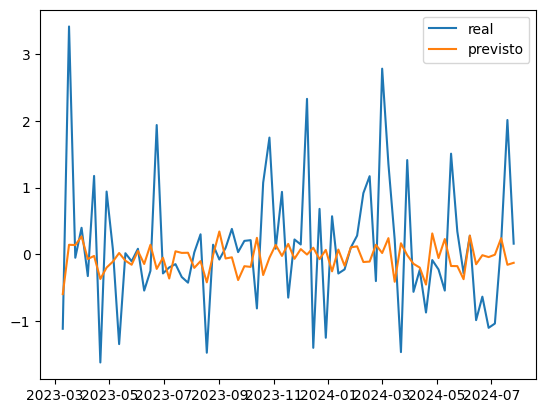

In [107]:
plt.plot(df_test.BTC_USD,label='real')
plt.plot(forecast_df.BTC_USD,label='previsto')
plt.legend()